/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6608 entries, 0 to 6607
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Topic Title      6608 non-null   object
 1   Category         6608 non-null   object
 2   Tags             6608 non-null   object
 3   Leading Comment  6601 non-null   object
 4   Other Comments   6608 non-null   object
 5   Likes            6607 non-null   object
 6   Views            6607 non-null   object
dtypes: object(7)
memory usage: 361.5+ KB


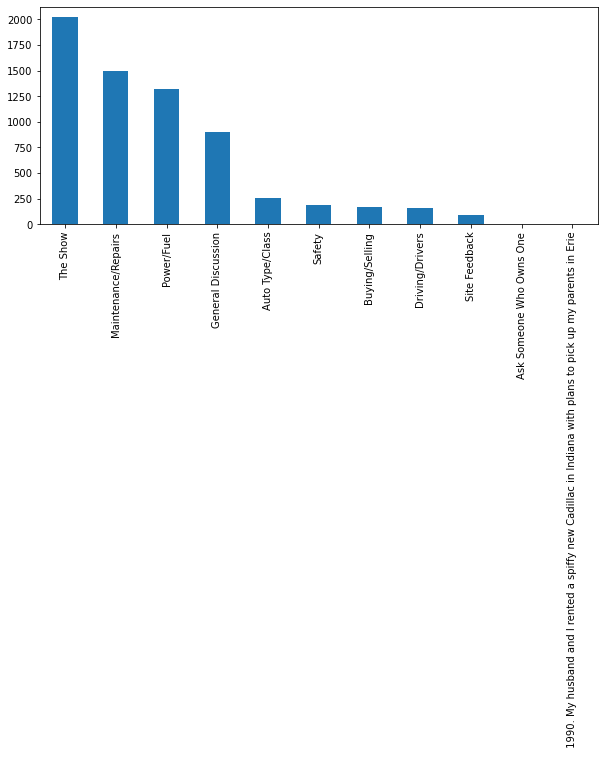

In [172]:

import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from textblob import TextBlob #for spelling correction
from textblob import Word
%matplotlib inline

data = pd.read_csv('combined_csv.csv')
df = data.copy()
df.drop(columns = ['Unnamed: 0', 'Commenters', 'Author'], inplace = True)
df.info()
df['post'] = df['Leading Comment'] #leave out components
df['post'].head()
df['post'][1]
df.dropna(inplace=True)
#print(df['post'].apply(lambda x: len(x.split(' '))).sum())
df['Category'].unique()
my_categories = ['Buying/Selling', 'Safety', 'Driving/Drivers', 'Site Feedback',
       'Auto Type/Class', 'Maintenance/Repairs', 'The Show',
       ' 1990. My husband and I rented a spiffy new Cadillac in Indiana with plans to pick up my parents in Erie',
       'Power/Fuel', 'General Discussion', 'Ask Someone Who Owns One']
plt.figure(figsize=(10,4))
df.Category.value_counts().plot(kind='bar');

In [173]:
def print_plot(index):
    example = df[df.index == index][['post', 'Category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Category:', example[1])
print_plot(10)

Hi,
I am not familiar with the process of getting out of a lease early. So my current car lease is $600/mo and I have paid 16 mo of it, so 20 more months remaining, which I still owe $12000 to the dealer.
Carvarna offers $50000 - 12000 (lease payoff amount) = $38000 would be the payment to me.
Kelly Blue Book Instant Cash offer is $49500 because it didn’t ask me if my car was own or lease.
Let’s say the residual value of the leased car is $32000, plus $12000 I still owe, I would have to pay the current dealer $47000 to buyout. I could accept Kelly’s offer, take the $49500, they get the car. I pay back the current dealer and make $2500.
But I don’t understand why Carvarna deducts the $12000, that they would take over the lease? All i need to do is to take their $38000 net offer, pay the current dealer the residual value of the car, and make $6000? i am so confused. Any idea?
Thank you
Category: Buying/Selling


/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [174]:
test_df = df.copy()
print_plot(10)

/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Hi,
I am not familiar with the process of getting out of a lease early. So my current car lease is $600/mo and I have paid 16 mo of it, so 20 more months remaining, which I still owe $12000 to the dealer.
Carvarna offers $50000 - 12000 (lease payoff amount) = $38000 would be the payment to me.
Kelly Blue Book Instant Cash offer is $49500 because it didn’t ask me if my car was own or lease.
Let’s say the residual value of the leased car is $32000, plus $12000 I still owe, I would have to pay the current dealer $47000 to buyout. I could accept Kelly’s offer, take the $49500, they get the car. I pay back the current dealer and make $2500.
But I don’t understand why Carvarna deducts the $12000, that they would take over the lease? All i need to do is to take their $38000 net offer, pay the current dealer the residual value of the car, and make $6000? i am so confused. Any idea?
Thank you
Category: Buying/Selling


In [175]:
#!pip install lxml
import lxml
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
#STOPWORDS = set(stopwords.words('english'))
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    #text = BeautifulSoup(text, features = "xml").text # HTML decoding
    text = BeautifulSoup(text, 'html.parser').text
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    #text = ''.join(word for word in text if word not in punct)  # remove punctuation
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['post'] = df['post'].apply(clean_text)


/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence \[
<>:3: DeprecationWarning: invalid escape sequence \[
<ipython-input-175-52e0c21ddbee>:3: DeprecationWarning: invalid escape sequence \[
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')
/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "http://hosted.ap.org/dynamic/stories/U/US_OBIT_CAR_TALK_HOST?SITE=AP&SECTION=HOME&TEMPLATE=DEFAULT" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to B

In [176]:
def test_print_plot(index):
    example = df[df.index == index][['post', 'Category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Category:', example[1])
test_print_plot(10)

hi familiar process getting lease early current car lease 600 mo paid 16 mo 20 months remaining still owe 12000 dealercarvarna offers 50000 12000 lease payoff amount 38000 would payment mekelly blue book instant cash offer 49500 ask car leaselet say residual value leased car 32000 plus 12000 still owe would pay current dealer 47000 buyout could accept kelly offer take 49500 get car pay back current dealer make 2500but understand carvarna deducts 12000 would take lease need take 38000 net offer pay current dealer residual value car make 6000 confused ideathank
Category: Buying/Selling


/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [177]:
#data modeling
X = df.post
y = df.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.head()


/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4796    helping friend get crv started problem found g...
2380    today repeat fuel tank problem incorrect answe...
5495    cooper really need super hovering 5 san diego ...
4550    legit ways boost fuel mileage tuners kn filter...
3548    listening week show itunes found unusually int...
Name: post, dtype: object

In [178]:
y_train.head()

/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4796    Power/Fuel
2380      The Show
5495    Power/Fuel
4550    Power/Fuel
3548      The Show
Name: Category, dtype: object

In [179]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('always')
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

#metrics.f1_score(y_test, y_pred, labels=np.unique(y_pred))

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1311 = accuracy_score(y_pred, y_test)
#print(set(y_test)-set(y_pred))
print(classification_report(y_test, y_pred,target_names=my_categories))

/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


accuracy 0.5388888888888889


ValueError: Number of classes, 10, does not match size of target_names, 11. Try specifying the labels parameter

In [ ]:
#linear support vector machine
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1321 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


accuracy 0.6611111111111111
                          precision    recall  f1-score   support

          Buying/Selling       0.00      0.00      0.00         1
                  Safety       0.32      0.09      0.15        74
         Driving/Drivers       0.59      0.17      0.27        58
           Site Feedback       0.69      0.41      0.51        54
         Auto Type/Class       0.60      0.24      0.34       274
     Maintenance/Repairs       0.65      0.80      0.72       452
                The Show       0.72      0.89      0.80       382
              Power/Fuel       0.90      0.14      0.24        66
      General Discussion       0.85      0.48      0.61        23
Ask Someone Who Owns One       0.64      0.82      0.72       596

                accuracy                           0.66      1980
               macro avg       0.60      0.40      0.43      1980
            weighted avg       0.65      0.66      0.62      1980



/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict (X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1331 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.703030303030303
                          precision    recall  f1-score   support

          Buying/Selling       0.00      0.00      0.00         1
                  Safety       0.46      0.28      0.35        74
         Driving/Drivers       0.53      0.43      0.48        58
           Site Feedback       0.68      0.48      0.57        54
         Auto Type/Class       0.50      0.49      0.50       274
     Maintenance/Repairs       0.68      0.75      0.71       452
                The Show       0.78      0.81      0.79       382
              Power/Fuel       0.65      0.36      0.47        66
      General Discussion       0.80      0.52      0.63        23
Ask Someone Who Owns One       0.79      0.84      0.82       596

                accuracy                           0.70      1980
               macro avg       0.59      0.50      0.53      1980
            weighted avg       0.70      0.70      0.70      1980



/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

dtree = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier(random_state=0)),
               ])
dtree.fit(X_train, y_train)

y_pred = dtree.predict (X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1341 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


accuracy 0.548989898989899


ValueError: Number of classes, 11, does not match size of target_names, 10. Try specifying the labels parameter

In [ ]:
#results
import pandas as pd

results = pd.DataFrame({'Model': ['Naive Bayes MultinomialNB', 'Linear SVM', 'Logistic Regression', 'Decision Tree'],
                         'Accuracy': [res1311, res1321, res1331, res1341]})
results.set_index('Model')
results.sort_values(by='Accuracy')

/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Model,Accuracy
0,Naive Bayes MultinomialNB,0.452503
3,Decision Tree,0.458631
1,Linear SVM,0.642492
2,Logistic Regression,0.663943


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
cv_res_sgd = cross_val_score(sgd, X_train, y_train, cv=10)
mean_cv_res_sgd = np.mean(cv_res_sgd)
print(mean_cv_res_sgd)

/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.664069264069264


/Users/jeff/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


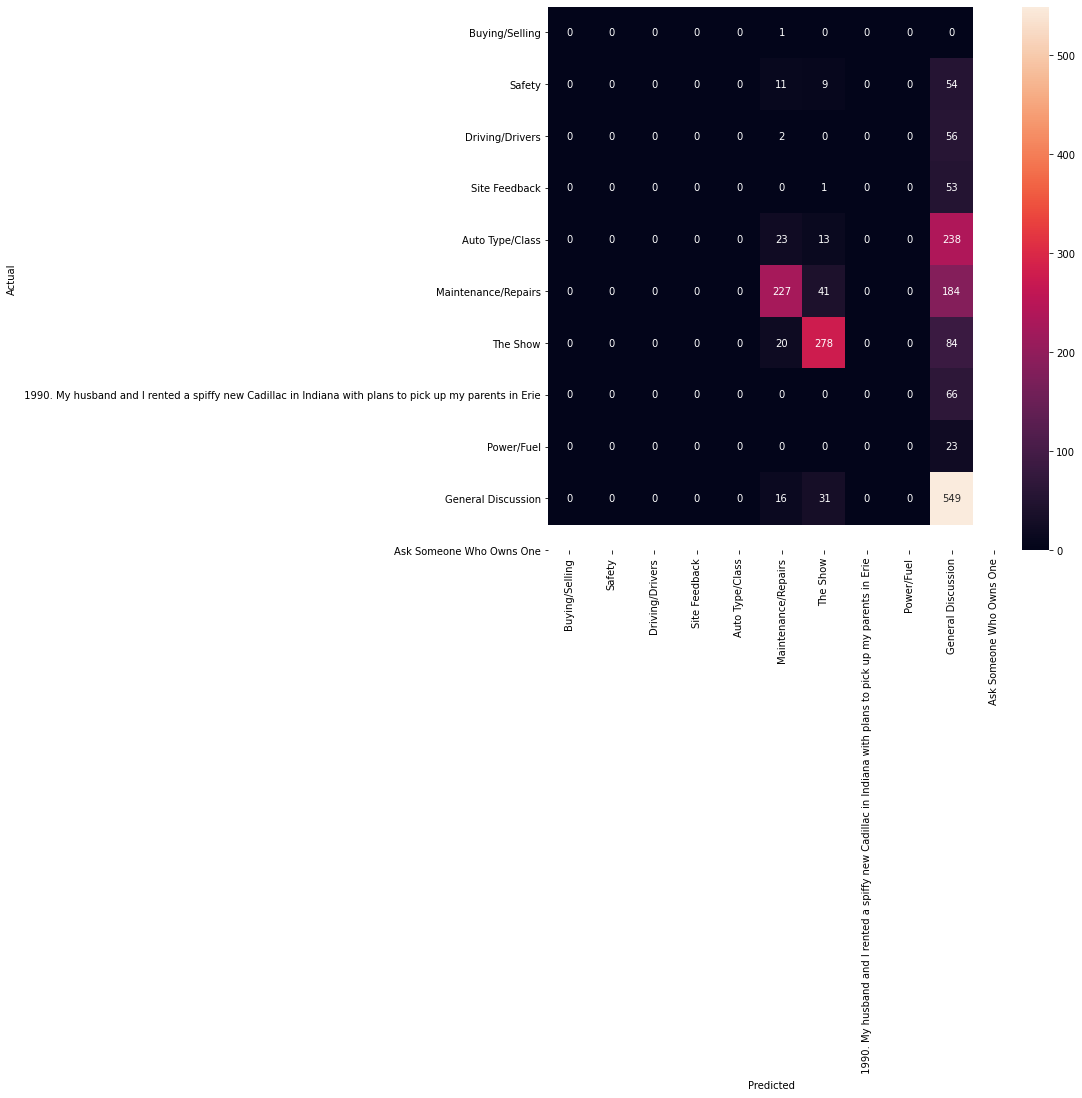

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=my_categories, yticklabels=my_categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()